In [72]:
# Import basic libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [73]:
df1 = pd.read_excel("/content/dataset1 (2).xlsx")
df2 = pd.read_excel("/content/dataset2 (2).xlsx")

In [74]:
df1.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,...,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,...,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,...,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,...,0,0,0,0,0,3,0,2,131,32


In [75]:
df2.head()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1


In [76]:
df1.shape

(51336, 26)

In [77]:
df2.shape

(51336, 62)

In [78]:
df1 = df1.loc[df1['Age_Oldest_TL'] != -99999]
df1.shape

(51296, 26)

In [79]:
columns_to_be_removed = []

for i in df2.columns:
    if df2.loc[df2[i] == -99999].shape[0] > 12834:
        columns_to_be_removed.append(i)

In [80]:
pd.DataFrame(columns_to_be_removed)

,0
0,time_since_first_deliquency
1,time_since_recent_deliquency
2,max_delinquency_level
3,max_deliq_6mts
4,CC_utilization
5,PL_utilization
6,max_unsec_exposure_inPct


In [81]:
df2 = df2.drop(columns_to_be_removed, axis=1)
df2.shape

(51336, 55)

In [82]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
df2 = df2.replace(-99999, np.nan)
numeric_cols = df2.select_dtypes(include=[np.number]).columns
non_numeric_cols = df2.select_dtypes(exclude=[np.number]).columns

imputer = KNNImputer(n_neighbors=5)
numeric_data_imputed = pd.DataFrame(imputer.fit_transform(df2[numeric_cols]),
                                    columns=numeric_cols)
df2 = pd.concat([numeric_data_imputed, df2[non_numeric_cols].reset_index(drop=True)], axis=1)


In [83]:
# Merge both the table basis inner join
df = pd.merge(df1, df2, how='inner', left_on=['PROSPECTID'], right_on = ['PROSPECTID'])

In [84]:
df.shape

(51296, 80)

In [85]:
df.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,Credit_Score,MARITALSTATUS,EDUCATION,GENDER,last_prod_enq2,first_prod_enq2,Approved_Flag
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,...,0.0,1.0,0.0,696.0,Married,12TH,M,PL,PL,P2
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0.0,0.0,0.0,685.0,Single,GRADUATE,F,ConsumerLoan,ConsumerLoan,P2
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,...,0.0,1.0,0.0,693.0,Married,SSC,M,ConsumerLoan,others,P2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,...,0.0,0.0,0.0,673.0,Married,SSC,M,others,others,P2
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,...,0.0,0.0,0.0,753.0,Married,POST-GRADUATE,M,AL,AL,P1


In [86]:
df.isnull().sum().sum()

np.int64(0)

In [87]:
# Check categorical variable
for i in df.columns:
    if df[i].dtype == 'object':
        print(i)

MARITALSTATUS
EDUCATION
GENDER
last_prod_enq2
first_prod_enq2
Approved_Flag


In [88]:
# Chi-Square Test
from scipy.stats import chi2_contingency

In [89]:
for i in ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']:
    chi2, pval,_,_ = chi2_contingency(pd.crosstab(df[i], df['Approved_Flag']))
    print(i, '---', pval)

MARITALSTATUS --- 2.7347247145640217e-257
EDUCATION --- 6.772122013692765e-38
GENDER --- 0.000259241464445085
last_prod_enq2 --- 0.0
first_prod_enq2 --- 0.0


In [90]:
# numerical columns
numeric_columns = []

for i in df.columns:
    if df[i].dtype !='object' and i not in ['PROSPECTID', 'Approved_Flag']:
        numeric_columns.append(i)

In [91]:
numeric_columns

['Total_TL',
 'Tot_Closed_TL',
 'Tot_Active_TL',
 'Total_TL_opened_L6M',
 'Tot_TL_closed_L6M',
 'pct_tl_open_L6M',
 'pct_tl_closed_L6M',
 'pct_active_tl',
 'pct_closed_tl',
 'Total_TL_opened_L12M',
 'Tot_TL_closed_L12M',
 'pct_tl_open_L12M',
 'pct_tl_closed_L12M',
 'Tot_Missed_Pmnt',
 'Auto_TL',
 'CC_TL',
 'Consumer_TL',
 'Gold_TL',
 'Home_TL',
 'PL_TL',
 'Secured_TL',
 'Unsecured_TL',
 'Other_TL',
 'Age_Oldest_TL',
 'Age_Newest_TL',
 'time_since_recent_payment',
 'num_times_delinquent',
 'max_recent_level_of_deliq',
 'num_deliq_6mts',
 'num_deliq_12mts',
 'num_deliq_6_12mts',
 'max_deliq_12mts',
 'num_times_30p_dpd',
 'num_times_60p_dpd',
 'num_std',
 'num_std_6mts',
 'num_std_12mts',
 'num_sub',
 'num_sub_6mts',
 'num_sub_12mts',
 'num_dbt',
 'num_dbt_6mts',
 'num_dbt_12mts',
 'num_lss',
 'num_lss_6mts',
 'num_lss_12mts',
 'recent_level_of_deliq',
 'tot_enq',
 'CC_enq',
 'CC_enq_L6m',
 'CC_enq_L12m',
 'PL_enq',
 'PL_enq_L6m',
 'PL_enq_L12m',
 'time_since_recent_enq',
 'enq_L12m',
 'e

In [92]:
# Variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [93]:
vif_data = df[numeric_columns]
total_columns = vif_data.shape[1]
columns_to_be_kept = []
column_index = 0

In [94]:
vif_data.shape

(51296, 73)

In [95]:
for i in range(0, total_columns):
    vif_value = variance_inflation_factor(vif_data, column_index)
    print(column_index, '----', vif_value)

    if vif_value <=6:
        columns_to_be_kept.append(numeric_columns[i])
        column_index = column_index+1
    else:
        vif_data = vif_data.drop([numeric_columns[i]], axis=1)

0 ---- inf
0 ---- inf
0 ---- 10.808504097229013
0 ---- 8.262091289331147
0 ---- 6.423033716642346
0 ---- 5.410171238537056
1 ---- 2.4933760845996433
2 ---- inf
2 ---- 1840.8784128796062
2 ---- 8.011290797280445
2 ---- 3.669475670776966
3 ---- 5.70794521390094
4 ---- 5.037275339371682
5 ---- 1.9568585519828932
6 ---- inf
6 ---- 4.752813261731107
7 ---- 21.06746036921018
7 ---- 31.324971699189586
7 ---- 4.451760769768236
8 ---- 2.992737884660284
9 ---- 2.797159028333598
10 ---- 4.0109134535083175
11 ---- 2.174443474634544
12 ---- 5.072957821555109
13 ---- 4.441536315706013
14 ---- 2.814417897809095
15 ---- 8.418362629197945
15 ---- 5.397904073040901
16 ---- inf
16 ---- 7.617108236642116
16 ---- 1.6770251768391249
17 ---- 1.9655295507622592
18 ---- 8.52012593305841
18 ---- 1.6914233144070856
19 ---- 7.090059771443651
19 ---- 15.407201019501667
19 ---- 1.8354528460042585
20 ---- 1.5687716228456237
21 ---- 2.5464825568508362
22 ---- 3.1042205006475347
23 ---- 2.197452082811609
24 ---- 7.384

In [96]:
len(columns_to_be_kept)

41

In [97]:
# For numerical - we have to use ANOVA Test
from scipy.stats import f_oneway

In [98]:
columns_to_be_kept_numerical = []

for i in columns_to_be_kept:
    a = list(df[i])
    b = list(df['Approved_Flag'])

    group_p1 = [value for value, group in zip(a,b) if group=='P1']
    group_p2 = [value for value, group in zip(a,b) if group=='P2']
    group_p3 = [value for value, group in zip(a,b) if group=='P3']
    group_p4 = [value for value, group in zip(a,b) if group=='P4']

    f_statistic, p_value = f_oneway(group_p1, group_p2, group_p3, group_p4)
    if p_value <=0.05:
        columns_to_be_kept_numerical.append(i)

In [99]:
len(columns_to_be_kept_numerical)

38

In [100]:
columns_to_be_kept_numerical

['pct_tl_open_L6M',
 'pct_tl_closed_L6M',
 'Tot_TL_closed_L12M',
 'pct_tl_open_L12M',
 'pct_tl_closed_L12M',
 'Tot_Missed_Pmnt',
 'CC_TL',
 'Home_TL',
 'PL_TL',
 'Secured_TL',
 'Unsecured_TL',
 'Other_TL',
 'Age_Oldest_TL',
 'Age_Newest_TL',
 'time_since_recent_payment',
 'max_recent_level_of_deliq',
 'num_deliq_6_12mts',
 'max_deliq_12mts',
 'num_times_60p_dpd',
 'num_std_12mts',
 'num_sub',
 'num_sub_12mts',
 'num_dbt',
 'num_dbt_12mts',
 'num_lss',
 'recent_level_of_deliq',
 'CC_enq_L12m',
 'PL_enq_L12m',
 'time_since_recent_enq',
 'enq_L3m',
 'NETMONTHLYINCOME',
 'Time_With_Curr_Empr',
 'CC_Flag',
 'PL_Flag',
 'pct_PL_enq_L6m_of_ever',
 'pct_CC_enq_L6m_of_ever',
 'HL_Flag',
 'GL_Flag']

In [101]:
# Final features
features = columns_to_be_kept_numerical + ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']

In [102]:
df = df[features + ['Approved_Flag']]

In [103]:
df.shape

(51296, 44)

In [104]:
# 'MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2'
df['MARITALSTATUS'].unique()

array(['Married', 'Single'], dtype=object)

In [105]:
df['EDUCATION'].unique()

array(['12TH', 'GRADUATE', 'SSC', 'POST-GRADUATE', 'UNDER GRADUATE',
       'OTHERS', 'PROFESSIONAL'], dtype=object)

In [106]:
df.loc[df['EDUCATION']=='SSC',['EDUCATION']] = 1
df.loc[df['EDUCATION']=='12TH',['EDUCATION']] = 2
df.loc[df['EDUCATION']=='UNDER GRADUATE',['EDUCATION']] = 3
df.loc[df['EDUCATION']=='GRADUATE',['EDUCATION']] = 3
df.loc[df['EDUCATION']=='POST-GRADUATE',['EDUCATION']] = 4
df.loc[df['EDUCATION']=='PROFESSIONAL',['EDUCATION']] = 3
df.loc[df['EDUCATION']=='OTHERS',['EDUCATION']] = 1
# Label Encoding

In [107]:
df['EDUCATION'].value_counts()

,count
EDUCATION,
3,22415
2,14458
1,12183
4,2240


In [108]:
df['EDUCATION'] = df['EDUCATION'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51296 entries, 0 to 51295
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   pct_tl_open_L6M            51296 non-null  float64
 1   pct_tl_closed_L6M          51296 non-null  float64
 2   Tot_TL_closed_L12M         51296 non-null  int64  
 3   pct_tl_open_L12M           51296 non-null  float64
 4   pct_tl_closed_L12M         51296 non-null  float64
 5   Tot_Missed_Pmnt            51296 non-null  int64  
 6   CC_TL                      51296 non-null  int64  
 7   Home_TL                    51296 non-null  int64  
 8   PL_TL                      51296 non-null  int64  
 9   Secured_TL                 51296 non-null  int64  
 10  Unsecured_TL               51296 non-null  int64  
 11  Other_TL                   51296 non-null  int64  
 12  Age_Oldest_TL              51296 non-null  int64  
 13  Age_Newest_TL              51296 non-null  int

In [109]:
df['GENDER'].unique()

array(['M', 'F'], dtype=object)

In [110]:
df['last_prod_enq2'].unique()

array(['PL', 'ConsumerLoan', 'others', 'AL', 'CC', 'HL'], dtype=object)

In [111]:
df['first_prod_enq2'].unique()

array(['PL', 'ConsumerLoan', 'others', 'AL', 'HL', 'CC'], dtype=object)

In [112]:
df_encoded = pd.get_dummies(df, columns=['MARITALSTATUS', 'GENDER', 'last_prod_enq2', 'first_prod_enq2'])

In [113]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51296 entries, 0 to 51295
Data columns (total 56 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pct_tl_open_L6M               51296 non-null  float64
 1   pct_tl_closed_L6M             51296 non-null  float64
 2   Tot_TL_closed_L12M            51296 non-null  int64  
 3   pct_tl_open_L12M              51296 non-null  float64
 4   pct_tl_closed_L12M            51296 non-null  float64
 5   Tot_Missed_Pmnt               51296 non-null  int64  
 6   CC_TL                         51296 non-null  int64  
 7   Home_TL                       51296 non-null  int64  
 8   PL_TL                         51296 non-null  int64  
 9   Secured_TL                    51296 non-null  int64  
 10  Unsecured_TL                  51296 non-null  int64  
 11  Other_TL                      51296 non-null  int64  
 12  Age_Oldest_TL                 51296 non-null  int64  
 13  A

In [114]:
k = df_encoded.describe()

In [115]:
k

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,...,enq_L3m,NETMONTHLYINCOME,Time_With_Curr_Empr,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,EDUCATION
count,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,...,51296.000000,5.129600e+04,51296.000000,51296.000000,51296.000000,51296.000000,51296.00000,51296.000000,51296.000000,51296.000000
mean,0.184718,0.089164,0.737426,0.395492,0.150106,0.546748,0.125078,0.070181,0.282712,2.846752,...,1.230579,2.642537e+04,110.714617,0.089539,0.167986,0.170518,0.05632,0.271308,0.052909,2.286806
std,0.297486,0.205700,1.454542,0.391927,0.257334,1.085863,0.505386,0.340963,0.858461,6.189165,...,1.954144,2.003178e+04,76.042109,0.285523,0.373857,0.350220,0.21354,0.444639,0.223853,0.875732
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.800000e+04,61.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.333000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,2.300000e+04,93.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000
75%,0.312000,0.054000,1.000000,0.750000,0.250000,1.000000,0.000000,0.000000,0.000000,3.000000,...,2.000000,3.000000e+04,131.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,3.000000
max,1.000000,1.000000,39.000000,1.000000,1.000000,34.000000,27.000000,10.000000,29.000000,235.000000,...,42.000000,2.500000e+06,1020.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,4.000000


In [116]:
df_encoded = df_encoded.drop(['MARITALSTATUS_Married','GENDER_F','last_prod_enq2_AL', 'first_prod_enq2_AL'], axis=1)

In [117]:
df_encoded.shape

(51296, 52)

In [118]:
df_encoded.head()

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,...,last_prod_enq2_CC,last_prod_enq2_ConsumerLoan,last_prod_enq2_HL,last_prod_enq2_PL,last_prod_enq2_others,first_prod_enq2_CC,first_prod_enq2_ConsumerLoan,first_prod_enq2_HL,first_prod_enq2_PL,first_prod_enq2_others
0,0.000,0.0,0,0.00,0.0,0,0,0,4,1,...,False,False,False,True,False,False,False,False,True,False
1,0.000,0.0,0,1.00,0.0,0,0,0,0,0,...,False,True,False,False,False,False,True,False,False,False
2,0.125,0.0,0,0.25,0.0,1,0,0,0,2,...,False,True,False,False,False,False,False,False,False,True
3,1.000,0.0,0,1.00,0.0,1,0,0,0,0,...,False,False,False,False,True,False,False,False,False,True
4,0.000,0.0,0,0.00,0.0,0,0,0,0,3,...,False,False,False,False,False,False,False,False,False,False


In [119]:
df_encoded.describe()

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,...,enq_L3m,NETMONTHLYINCOME,Time_With_Curr_Empr,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,EDUCATION
count,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,...,51296.000000,5.129600e+04,51296.000000,51296.000000,51296.000000,51296.000000,51296.00000,51296.000000,51296.000000,51296.000000
mean,0.184718,0.089164,0.737426,0.395492,0.150106,0.546748,0.125078,0.070181,0.282712,2.846752,...,1.230579,2.642537e+04,110.714617,0.089539,0.167986,0.170518,0.05632,0.271308,0.052909,2.286806
std,0.297486,0.205700,1.454542,0.391927,0.257334,1.085863,0.505386,0.340963,0.858461,6.189165,...,1.954144,2.003178e+04,76.042109,0.285523,0.373857,0.350220,0.21354,0.444639,0.223853,0.875732
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.800000e+04,61.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.333000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,2.300000e+04,93.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000
75%,0.312000,0.054000,1.000000,0.750000,0.250000,1.000000,0.000000,0.000000,0.000000,3.000000,...,2.000000,3.000000e+04,131.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,3.000000
max,1.000000,1.000000,39.000000,1.000000,1.000000,34.000000,27.000000,10.000000,29.000000,235.000000,...,42.000000,2.500000e+06,1020.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,4.000000


In [120]:
df_encoded.isnull().sum().sum()

np.int64(0)

In [121]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51296 entries, 0 to 51295
Data columns (total 52 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pct_tl_open_L6M               51296 non-null  float64
 1   pct_tl_closed_L6M             51296 non-null  float64
 2   Tot_TL_closed_L12M            51296 non-null  int64  
 3   pct_tl_open_L12M              51296 non-null  float64
 4   pct_tl_closed_L12M            51296 non-null  float64
 5   Tot_Missed_Pmnt               51296 non-null  int64  
 6   CC_TL                         51296 non-null  int64  
 7   Home_TL                       51296 non-null  int64  
 8   PL_TL                         51296 non-null  int64  
 9   Secured_TL                    51296 non-null  int64  
 10  Unsecured_TL                  51296 non-null  int64  
 11  Other_TL                      51296 non-null  int64  
 12  Age_Oldest_TL                 51296 non-null  int64  
 13  A

In [122]:
bool_columns = ['MARITALSTATUS_Single','GENDER_M','last_prod_enq2_CC','last_prod_enq2_ConsumerLoan','last_prod_enq2_HL',
                'last_prod_enq2_PL','last_prod_enq2_others','first_prod_enq2_CC','first_prod_enq2_ConsumerLoan',
                'first_prod_enq2_HL','first_prod_enq2_PL','first_prod_enq2_others']
bool_columns

['MARITALSTATUS_Single',
 'GENDER_M',
 'last_prod_enq2_CC',
 'last_prod_enq2_ConsumerLoan',
 'last_prod_enq2_HL',
 'last_prod_enq2_PL',
 'last_prod_enq2_others',
 'first_prod_enq2_CC',
 'first_prod_enq2_ConsumerLoan',
 'first_prod_enq2_HL',
 'first_prod_enq2_PL',
 'first_prod_enq2_others']

In [123]:
df_encoded[bool_columns] = df_encoded[bool_columns].astype(float)
print(df_encoded[bool_columns].dtypes)

MARITALSTATUS_Single            float64
GENDER_M                        float64
last_prod_enq2_CC               float64
last_prod_enq2_ConsumerLoan     float64
last_prod_enq2_HL               float64
last_prod_enq2_PL               float64
last_prod_enq2_others           float64
first_prod_enq2_CC              float64
first_prod_enq2_ConsumerLoan    float64
first_prod_enq2_HL              float64
first_prod_enq2_PL              float64
first_prod_enq2_others          float64
dtype: object


# Exploratory Data Analysis

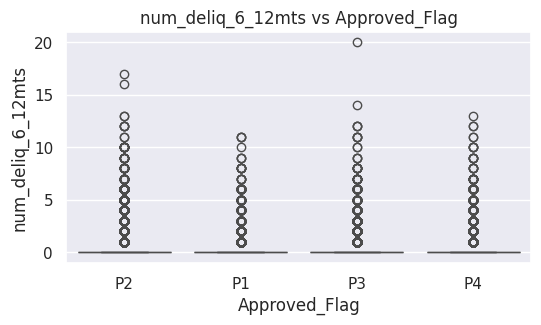

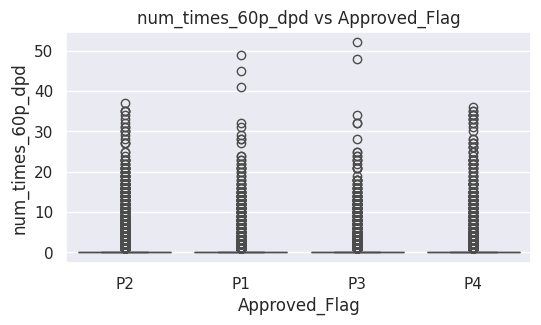

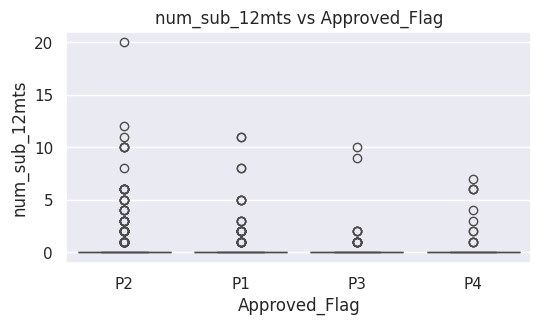

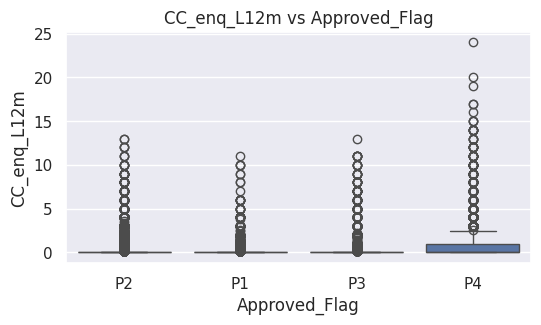

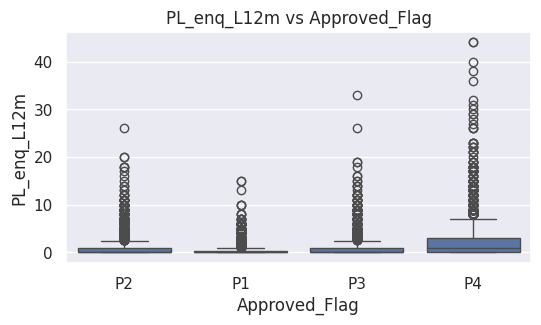

In [135]:
cols = ['num_deliq_6_12mts', 'num_times_60p_dpd', 'num_sub_12mts', 'CC_enq_L12m', 'PL_enq_L12m']
for col in cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=df, x='Approved_Flag', y=col)
    plt.title(f"{col} vs Approved_Flag")
    plt.show()


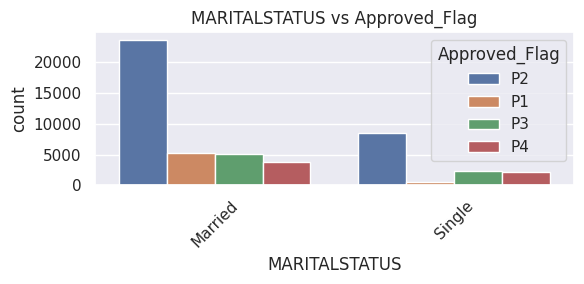

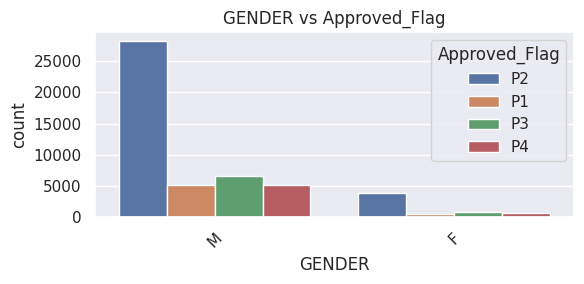

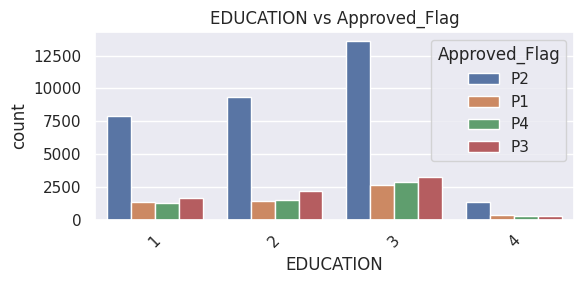

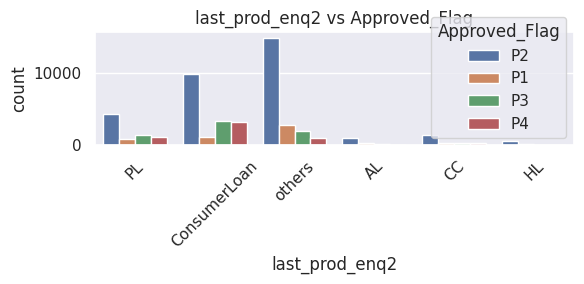

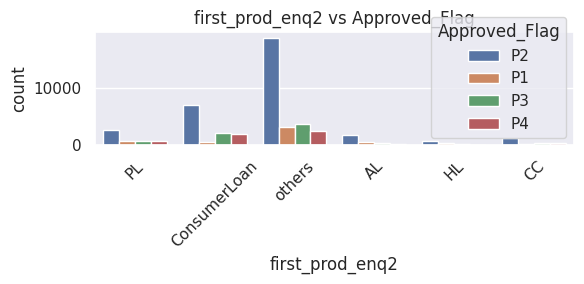

In [136]:
categorical = ['MARITALSTATUS', 'GENDER', 'EDUCATION', 'last_prod_enq2', 'first_prod_enq2']

for col in categorical:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df, x=col, hue='Approved_Flag')
    plt.title(f'{col} vs Approved_Flag')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


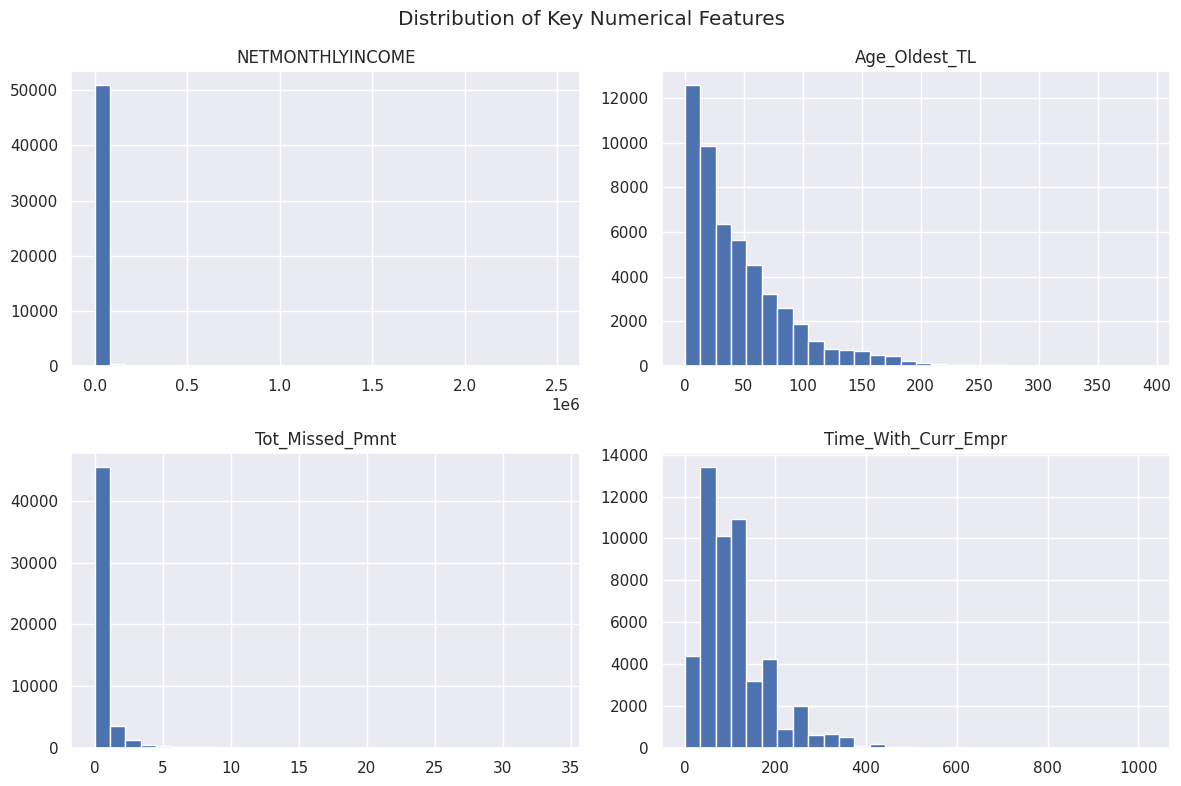

In [137]:
num_features = ['NETMONTHLYINCOME', 'Age_Oldest_TL', 'Tot_Missed_Pmnt', 'Time_With_Curr_Empr']
df[num_features].hist(bins=30, figsize=(12, 8))
plt.suptitle("Distribution of Key Numerical Features")
plt.tight_layout()
plt.show()


In [124]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51296 entries, 0 to 51295
Data columns (total 52 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pct_tl_open_L6M               51296 non-null  float64
 1   pct_tl_closed_L6M             51296 non-null  float64
 2   Tot_TL_closed_L12M            51296 non-null  int64  
 3   pct_tl_open_L12M              51296 non-null  float64
 4   pct_tl_closed_L12M            51296 non-null  float64
 5   Tot_Missed_Pmnt               51296 non-null  int64  
 6   CC_TL                         51296 non-null  int64  
 7   Home_TL                       51296 non-null  int64  
 8   PL_TL                         51296 non-null  int64  
 9   Secured_TL                    51296 non-null  int64  
 10  Unsecured_TL                  51296 non-null  int64  
 11  Other_TL                      51296 non-null  int64  
 12  Age_Oldest_TL                 51296 non-null  int64  
 13  A

In [125]:
df_encoded['Approved_Flag'].value_counts(normalize=True)

,proportion
Approved_Flag,
P2,0.626988
P3,0.145216
P4,0.114668
P1,0.113128


In [126]:
# Split the data into dependent and independent variable
x = df_encoded.drop(columns=['Approved_Flag'], axis=1)
y = df_encoded['Approved_Flag']

In [127]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

In [128]:
# SMOTE
smote = SMOTE(random_state=101)
x_smote, y_smote = smote.fit_resample(x, y)
print("after smote, class distribution is:")
print(pd.Series(y_smote).value_counts(normalize=True))

after smote, class distribution is:
Approved_Flag
P2    0.25
P1    0.25
P3    0.25
P4    0.25
Name: proportion, dtype: float64


In [129]:
x_smote.shape

(128648, 51)

In [130]:
y_smote.shape

(128648,)

In [131]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=101, stratify=y_smote)

# Random Forest Classifier

In [132]:
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

rf_classifier = RandomForestClassifier(n_estimators=200, random_state=101)
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print()
print(f"Accuracy : {accuracy}")
print()
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v} :")
    print(f"Precision : {precision[i]}")
    print(f"Recall : {recall[i]}")
    print(f"F1_Score : {f1_score[i]}")
    print()


Accuracy : 0.8839875631558493

Class p1 :
Precision : 0.9305555555555556
Recall : 0.96875
F1_Score : 0.9492687385740403

Class p2 :
Precision : 0.8609633794256192
Recall : 0.8807710244054096
F1_Score : 0.8707545719993853

Class p3 :
Precision : 0.839312531286501
Recall : 0.7820273631840796
F1_Score : 0.8096579476861167

Class p4 :
Precision : 0.9006191950464396
Recall : 0.9043991916679621
F1_Score : 0.9025052353990537



In [133]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          P1       0.93      0.97      0.95      6432
          P2       0.86      0.88      0.87      6433
          P3       0.84      0.78      0.81      6432
          P4       0.90      0.90      0.90      6433

    accuracy                           0.88     25730
   macro avg       0.88      0.88      0.88     25730
weighted avg       0.88      0.88      0.88     25730

